<a href="https://colab.research.google.com/github/atlas-github/fi_analytics/blob/master/Chapter_10_An_introduction_to_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("user_transactions.csv")
df

,id,user_id,sum_amount_usd,count_amount_usd,transactions_2018,transactions_2019_May,last_transaction_month,months,transaction_april,transaction_may
0,0,user_0,13684,389,254,135,May-19,0,1,1
1,1,user_1,6104,129,113,16,Feb-19,3,0,0
2,2,user_2,1335,96,68,28,Apr-19,1,1,0
3,3,user_3,16578,268,266,2,Mar-19,2,0,0
4,4,user_4,9127,47,43,4,Jan-19,4,0,0
...,...,...,...,...,...,...,...,...,...,...
18663,19425,user_19425,598,24,2,22,May-19,0,1,1
18664,19426,user_19426,33168,178,4,174,May-19,0,1,1
18665,19427,user_19427,1243,130,0,130,May-19,0,1,1
18666,19428,user_19428,1277,22,2,20,Apr-19,1,1,0


In [2]:
df.describe()

,id,sum_amount_usd,count_amount_usd,transactions_2018,transactions_2019_May,months,transaction_april,transaction_may
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,9639.734465,10277.461378,144.402668,74.101028,70.301639,2.230823,0.612599,0.469466
std,5603.113411,42414.728328,242.768788,137.872083,134.154116,3.402645,0.487170,0.499080
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4778.750000,462.000000,17.000000,5.000000,2.000000,0.000000,0.000000,0.000000
50%,9584.500000,2511.000000,60.000000,25.000000,22.000000,1.000000,1.000000,0.000000
75%,14482.250000,8050.250000,164.000000,81.000000,76.000000,3.000000,1.000000,1.000000
max,19429.000000,970341.000000,5285.000000,2283.000000,3242.000000,16.000000,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


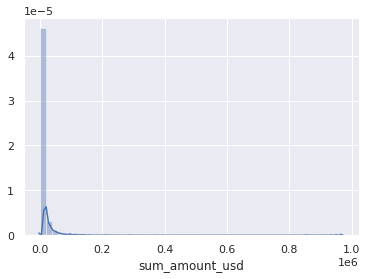

In [3]:
import seaborn as sns
sns.set()
ax = sns.distplot(df["sum_amount_usd"])
ax

In [4]:
import numpy as np
from sklearn.preprocessing import RobustScaler

#columns as independent variables
x = df[['sum_amount_usd', 'count_amount_usd', 'transactions_2018', 'transactions_2019_May', "months"]].values

#fit the columns into RobustScaler and transform
transformer = RobustScaler().fit(x)
x_scaled = transformer.transform(x)

#preview the data
df_temp = pd.DataFrame(x_scaled, columns = ['sum_amount_usd', 'count_amount_usd', 'transactions_2018', 'transactions_2019_May', "months"], index = df.index)
df_temp

,sum_amount_usd,count_amount_usd,transactions_2018,transactions_2019_May,months
0,1.472408,2.238095,3.013158,1.527027,-0.333333
1,0.473495,0.469388,1.157895,-0.081081,0.666667
2,-0.154976,0.244898,0.565789,0.081081,0.000000
3,1.853787,1.414966,3.171053,-0.270270,0.333333
4,0.871874,-0.088435,0.236842,-0.243243,1.000000
...,...,...,...,...,...
18663,-0.252100,-0.244898,-0.302632,0.000000,-0.333333
18664,4.040062,0.802721,-0.276316,2.054054,-0.333333
18665,-0.167100,0.476190,-0.328947,1.459459,-0.333333
18666,-0.162620,-0.258503,-0.302632,-0.027027,0.000000


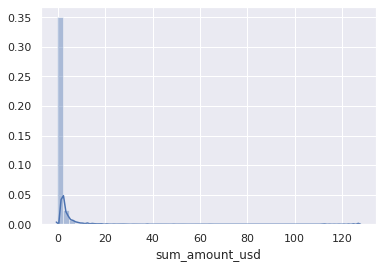

In [5]:
ay = sns.distplot(df_temp["sum_amount_usd"])
ay

In [6]:
df_temp.describe()

,sum_amount_usd,count_amount_usd,transactions_2018,transactions_2019_May,months
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,1.023485,0.574168,0.646066,0.652725,0.410274
std,5.589527,1.651488,1.814106,1.812893,1.134215
min,-0.330906,-0.401361,-0.328947,-0.297297,-0.333333
25%,-0.270023,-0.292517,-0.263158,-0.270270,-0.333333
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.729977,0.707483,0.736842,0.729730,0.666667
max,127.543241,35.544218,29.710526,43.513514,5.000000


In [7]:
df['sum_amount_usd'] = df_temp['sum_amount_usd']
df['count_amount_usd'] = df_temp['count_amount_usd']
df['transactions_2018'] = df_temp['transactions_2018']
df['transactions_2019_May'] = df_temp['transactions_2019_May']
df['months'] = df_temp['months']
df

,id,user_id,sum_amount_usd,count_amount_usd,transactions_2018,transactions_2019_May,last_transaction_month,months,transaction_april,transaction_may
0,0,user_0,1.472408,2.238095,3.013158,1.527027,May-19,-0.333333,1,1
1,1,user_1,0.473495,0.469388,1.157895,-0.081081,Feb-19,0.666667,0,0
2,2,user_2,-0.154976,0.244898,0.565789,0.081081,Apr-19,0.000000,1,0
3,3,user_3,1.853787,1.414966,3.171053,-0.270270,Mar-19,0.333333,0,0
4,4,user_4,0.871874,-0.088435,0.236842,-0.243243,Jan-19,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...
18663,19425,user_19425,-0.252100,-0.244898,-0.302632,0.000000,May-19,-0.333333,1,1
18664,19426,user_19426,4.040062,0.802721,-0.276316,2.054054,May-19,-0.333333,1,1
18665,19427,user_19427,-0.167100,0.476190,-0.328947,1.459459,May-19,-0.333333,1,1
18666,19428,user_19428,-0.162620,-0.258503,-0.302632,-0.027027,Apr-19,0.000000,1,0


In [8]:
#split dataset to features and target variable
feature_cols = ['sum_amount_usd', 'count_amount_usd', 'transactions_2018', 'transactions_2019_May', "months"]
X = df[feature_cols]
y = df.transaction_april

In [9]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [10]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [11]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1633,  188],
       [   0, 2846]])

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9597171630597815
Precision: 0.9380355965721819
Recall: 1.0


In [13]:
output = pd.merge(pd.DataFrame(y_test), df["transaction_may"], left_index=True, right_index=True).reset_index()
output

,index,transaction_april,transaction_may
0,18289,1,1
1,13142,1,1
2,17648,1,1
3,651,0,0
4,11944,1,1
...,...,...,...
4662,14877,1,1
4663,8788,1,1
4664,5920,0,1
4665,1906,0,0


In [14]:
result = pd.merge(output, pd.DataFrame(y_pred, columns = {"prediction"}), left_index=True, right_index=True)
result

,index,transaction_april,transaction_may,prediction
0,18289,1,1,1
1,13142,1,1,1
2,17648,1,1,1
3,651,0,0,0
4,11944,1,1,1
...,...,...,...,...
4662,14877,1,1,1
4663,8788,1,1,1
4664,5920,0,1,1
4665,1906,0,0,0


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(result["transaction_may"], result["prediction"])

array([[1633,  893],
       [   0, 2141]])